In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
books = pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
frequent_books = apriori(books, min_support = 0.005, max_len = 3, use_colnames = True)
frequent_books.sort_values("support", ascending = False, inplace = True)
frequent_books

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
206,0.0065,"(ItalAtlas, RefBks, Florence)"
64,0.0065,"(ItalAtlas, Florence)"
207,0.0055,"(Florence, RefBks, ItalArt)"
109,0.0055,"(ItalAtlas, ChildBks, Florence)"


In [6]:
rules = association_rules(frequent_books, metric = "lift", min_threshold= 1)
rules_r = rules.sort_values('lift', ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(Florence, ItalArt)",(YouthBks),0.0125,0.2475,0.0055,0.440000,1.777778,0.002406,1.343750
1050,"(YouthBks, Florence)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1051,(ItalArt),"(YouthBks, Florence)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145
1052,(YouthBks),"(Florence, ItalArt)",0.2475,0.0125,0.0055,0.022222,1.777778,0.002406,1.009943


In [7]:
frequent_books_1 = apriori(books, min_support=0.005, max_len=5, use_colnames=True)
rules1 = association_rules(frequent_books_1, metric = "lift", min_threshold= 1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
14045,(ItalArt),"(GeogBks, ItalCook, Florence, ArtBks)",0.0485,0.0100,0.0075,0.154639,15.463918,0.007015,1.171098
14046,(GeogBks),"(Florence, ItalCook, ItalArt, ArtBks)",0.2760,0.0095,0.0075,0.027174,2.860412,0.004878,1.018168
14047,(ItalCook),"(GeogBks, Florence, ItalArt, ArtBks)",0.1135,0.0090,0.0075,0.066079,7.342144,0.006478,1.061118
14048,(Florence),"(GeogBks, ItalCook, ItalArt, ArtBks)",0.1085,0.0240,0.0075,0.069124,2.880184,0.004896,1.048475


In [8]:
frequent_books_2 = apriori(books, min_support=0.005, max_len=4, use_colnames=True)
rules2 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
4955,"(ItalCook, ItalArt)","(GeogBks, Florence)",0.0375,0.0425,0.0075,0.200000,4.705882,0.005906,1.196875
4956,(Florence),"(GeogBks, ItalCook, ItalArt)",0.1085,0.0240,0.0075,0.069124,2.880184,0.004896,1.048475
4957,(GeogBks),"(ItalArt, ItalCook, Florence)",0.2760,0.0095,0.0075,0.027174,2.860412,0.004878,1.018168
4958,(ItalCook),"(GeogBks, ItalArt, Florence)",0.1135,0.0090,0.0075,0.066079,7.342144,0.006478,1.061118


In [9]:
frequent_books_3 = apriori(books, min_support=0.005, max_len=3, use_colnames=True)
rules3 = association_rules(frequent_books_3, metric = "lift", min_threshold= 1.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
999,"(ItalArt, Florence)",(ItalCook),0.0125,0.1135,0.0095,0.760000,6.696035,0.008081,3.693750
1000,"(ItalCook, ItalArt)",(Florence),0.0375,0.1085,0.0095,0.253333,2.334869,0.005431,1.193973
1001,(Florence),"(ItalCook, ItalArt)",0.1085,0.0375,0.0095,0.087558,2.334869,0.005431,1.054861
1002,(ItalCook),"(ItalArt, Florence)",0.1135,0.0125,0.0095,0.083700,6.696035,0.008081,1.077704


In [10]:
frequent_books_4 = apriori(books, min_support=0.01, max_len=3, use_colnames=True)
rules4 = association_rules(frequent_books_4, metric = "confidence", min_threshold= 0.8)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
2,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
3,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
4,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
...,...,...,...,...,...,...,...,...,...
69,"(ItalCook, ItalArt)",(ArtBks),0.0375,0.2410,0.0375,1.000000,4.149378,0.028463,inf
70,"(ItalAtlas, ItalArt)",(ArtBks),0.0165,0.2410,0.0165,1.000000,4.149378,0.012523,inf
71,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
72,"(ItalArt, Florence)",(ArtBks),0.0125,0.2410,0.0125,1.000000,4.149378,0.009488,inf


In [11]:
frequent_books_5 = apriori(books, min_support=0.1, max_len=3, use_colnames=True)
rules5 = association_rules(frequent_books_5, metric = "confidence", min_threshold= 0.8)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


In [12]:
support=rules['support']
confidence=rules['confidence']
support

0       0.2560
1       0.2560
2       0.1950
3       0.1950
4       0.1925
         ...  
1049    0.0055
1050    0.0055
1051    0.0055
1052    0.0055
1053    0.0055
Name: support, Length: 1054, dtype: float64

<ipython-input-13-ef7fb732c654>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar((range(1,11)), frequent_books.support[1:11], color='rkbyc')


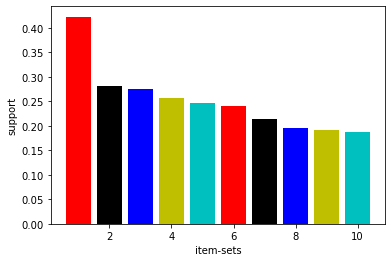

In [13]:
plt.bar((range(1,11)), frequent_books.support[1:11], color='rkbyc')
plt.xlabel('item-sets');plt.ylabel('support');

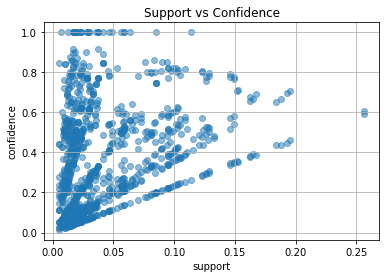

In [14]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.grid()
plt.show()

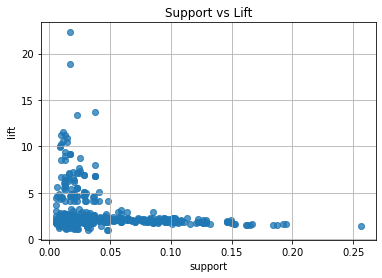

In [15]:
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.grid()
plt.show()

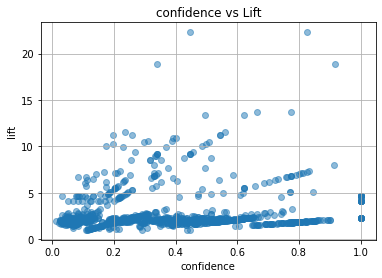

In [16]:
plt.scatter(rules["confidence"], rules["lift"], alpha=0.5)
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs Lift")
plt.grid()
plt.show()